In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# -----------------------------
# Step 1: Data Preparation and Exploration
# -----------------------------

# Load the Wine dataset from sklearn
wine_dataset = load_wine()
wine_df = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)

# Examine the dataset's structure
print("Dataset Head:")
wine_df.head()

Dataset Head:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
print("\nDataset Info:")
wine_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    flo

In [5]:
print("\nDataset Description:")
wine_df.describe()


Dataset Description:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# Standardize the dataset's features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(wine_df)

# Apply PCA for visualization (reduce to 2 dimensions)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standardized_data)


HIERARCHICAL CLUSTERING RESULTS
n_clusters=2: Silhouette Score = 0.2670


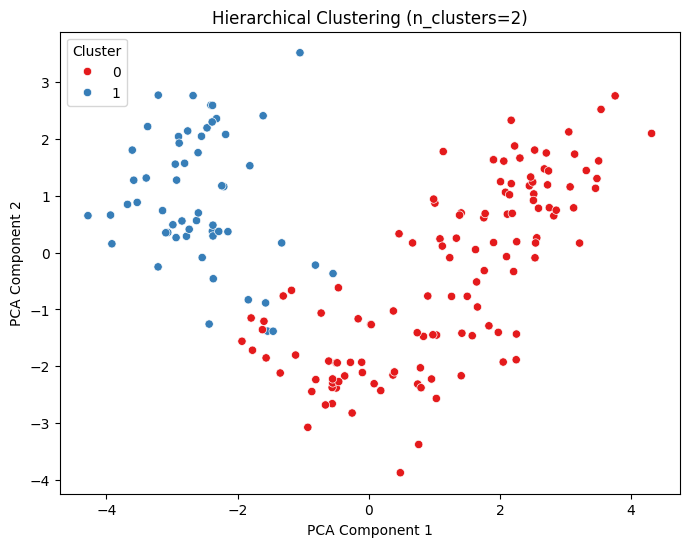

n_clusters=3: Silhouette Score = 0.2774


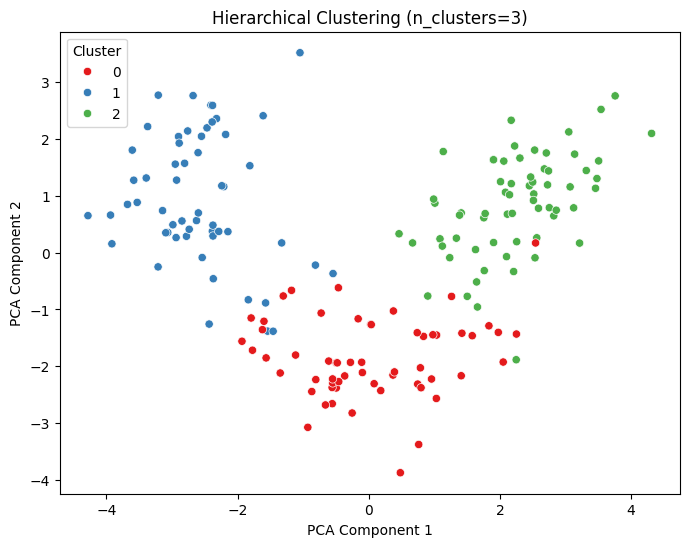

n_clusters=4: Silhouette Score = 0.2258


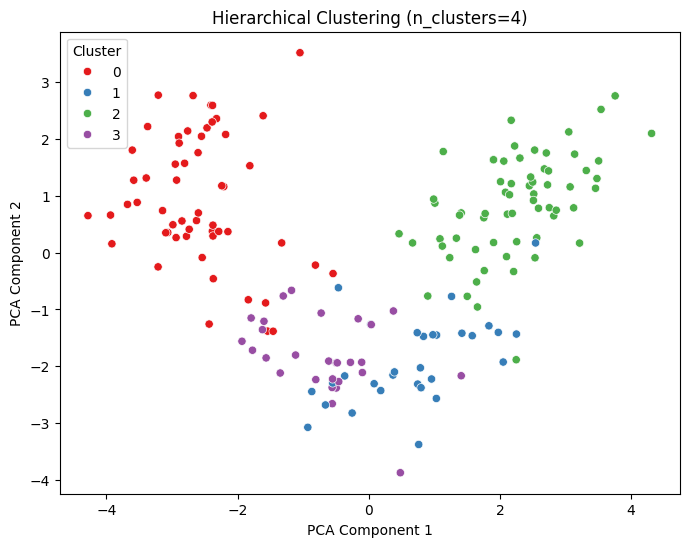

n_clusters=5: Silhouette Score = 0.1867


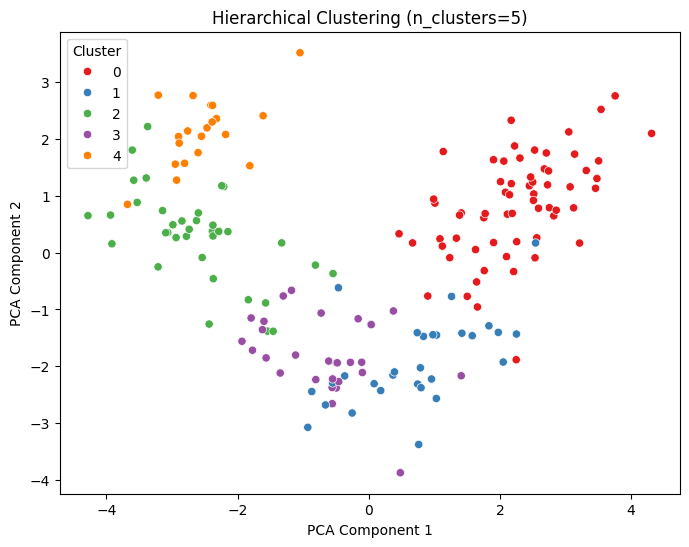

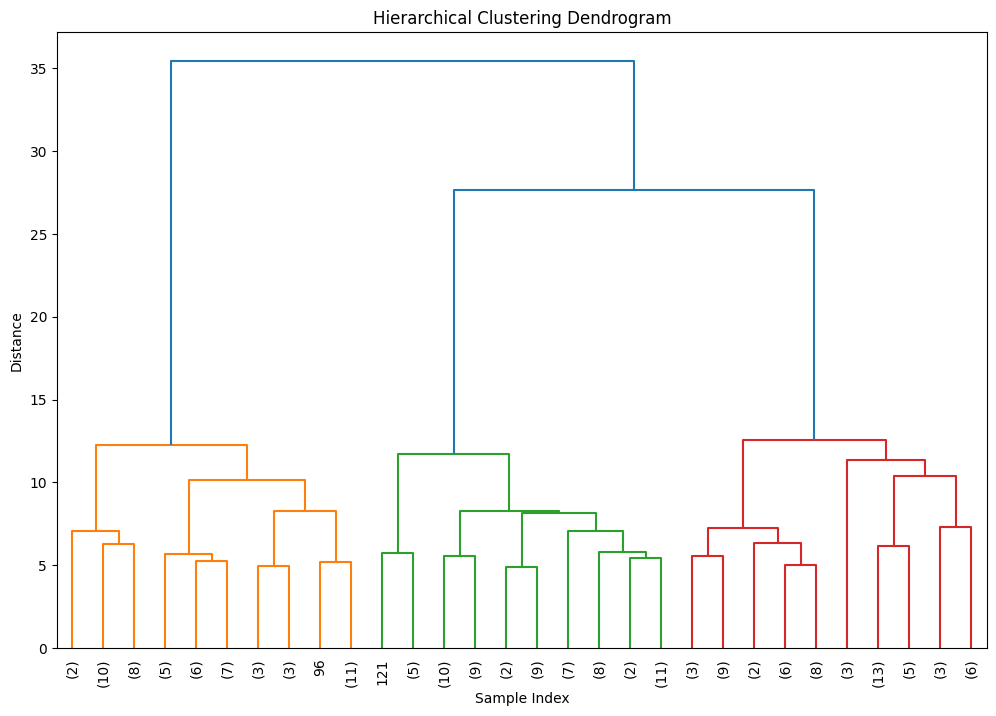

In [7]:
# -----------------------------
# Step 2: Hierarchical Clustering
# -----------------------------

# Test different values for n_clusters
n_clusters_list = [2, 3, 4, 5]

print("\n" + "="*50)
print("HIERARCHICAL CLUSTERING RESULTS")
print("="*50)

for n_clust in n_clusters_list:
    # Apply Agglomerative Hierarchical Clustering
    hierarchical_model = AgglomerativeClustering(n_clusters=n_clust)
    hierarchical_labels = hierarchical_model.fit_predict(standardized_data)

    # Calculate silhouette score
    sil_score = silhouette_score(standardized_data, hierarchical_labels)
    print(f"n_clusters={n_clust}: Silhouette Score = {sil_score:.4f}")

    # Visualize the resulting clusters using scatter plots
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=hierarchical_labels, palette='Set1')
    plt.title(f'Hierarchical Clustering (n_clusters={n_clust})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.show()

# Generate and interpret a dendrogram
linkage_matrix = linkage(standardized_data, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


DBSCAN CLUSTERING RESULTS
eps=0.5, min_samples=3: 0 clusters, 178 noise points

eps=0.5, min_samples=5: 0 clusters, 178 noise points

eps=0.5, min_samples=7: 0 clusters, 178 noise points

eps=1.0, min_samples=3: 0 clusters, 178 noise points

eps=1.0, min_samples=5: 0 clusters, 178 noise points

eps=1.0, min_samples=7: 0 clusters, 178 noise points

eps=1.5, min_samples=3: 8 clusters, 147 noise points
  Silhouette Score: 0.3311
  Homogeneity Score: 1.0000
  Completeness Score: 0.4319

eps=1.5, min_samples=5: 0 clusters, 178 noise points

eps=1.5, min_samples=7: 0 clusters, 178 noise points

eps=2.0, min_samples=3: 5 clusters, 64 noise points
  Silhouette Score: 0.2113
  Homogeneity Score: 0.5801
  Completeness Score: 0.6273

eps=2.0, min_samples=5: 5 clusters, 85 noise points
  Silhouette Score: 0.2405
  Homogeneity Score: 0.5858
  Completeness Score: 0.6056

eps=2.0, min_samples=7: 3 clusters, 110 noise points
  Silhouette Score: 0.4415
  Homogeneity Score: 0.9154
  Completeness Score:

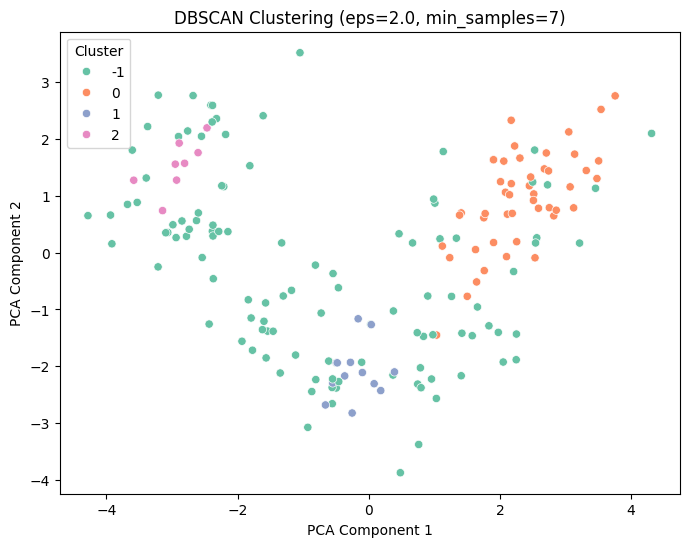

In [8]:
# -----------------------------
# Step 3: DBSCAN Clustering
# -----------------------------

# Experiment with different values for eps and min_samples parameters
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 7]

print("\n" + "="*50)
print("DBSCAN CLUSTERING RESULTS")
print("="*50)

best_silhouette = -1
best_params = {}

for eps_val in eps_values:
    for min_samp in min_samples_values:
        # Apply DBSCAN algorithm
        dbscan_model = DBSCAN(eps=eps_val, min_samples=min_samp)
        dbscan_labels = dbscan_model.fit_predict(standardized_data)

        # Count clusters and noise points
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        n_noise = list(dbscan_labels).count(-1)

        print(f"eps={eps_val}, min_samples={min_samp}: {n_clusters} clusters, {n_noise} noise points")

        # Calculate metrics if valid clusters exist
        if n_clusters > 1:
            # Filter out noise points for evaluation
            mask = dbscan_labels != -1
            if np.sum(mask) > 0:
                filtered_data = standardized_data[mask]
                filtered_labels = dbscan_labels[mask]

                # Compute evaluation metrics
                silhouette = silhouette_score(filtered_data, filtered_labels)
                homogeneity = homogeneity_score(wine_dataset.target[mask], filtered_labels)
                completeness = completeness_score(wine_dataset.target[mask], filtered_labels)

                print(f"  Silhouette Score: {silhouette:.4f}")
                print(f"  Homogeneity Score: {homogeneity:.4f}")
                print(f"  Completeness Score: {completeness:.4f}")

                # Track best parameters
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_params = {'eps': eps_val, 'min_samples': min_samp}
        print()

# Display visualizations of the best DBSCAN result
if best_params:
    print(f"Best DBSCAN parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")

    # Apply DBSCAN with best parameters
    best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
    best_labels = best_dbscan.fit_predict(standardized_data)

    # Visualize clusters and highlight noise points
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=best_labels, palette='Set2')
    plt.title(f'DBSCAN Clustering (eps={best_params["eps"]}, min_samples={best_params["min_samples"]})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.show()

In [9]:




# -----------------------------
# Step 4: Analysis and Insights
# -----------------------------

print("\n" + "="*60)
print("ANALYSIS AND INSIGHTS")
print("="*60)

print("COMPARISON BETWEEN HIERARCHICAL AND DBSCAN CLUSTERING:")
print("\nHierarchical Clustering:")
print("- Requires pre-specification of number of clusters")
print("- All data points are assigned to clusters")
print("- Works well with spherical clusters")
print("- Deterministic results")

print("\nDBSCAN Clustering:")
print("- Automatically determines number of clusters")
print("- Can identify noise points and outliers")
print("- Works well with arbitrary cluster shapes")
print("- Sensitive to parameter selection (eps and min_samples)")

print("\nParameter Influence:")
print("- Higher eps values in DBSCAN lead to fewer, larger clusters")
print("- Lower min_samples values create more clusters with smaller minimum sizes")
print("- Different n_clusters in hierarchical clustering affects granularity of groupings")

print("\nStrengths and Weaknesses:")
print("Hierarchical Clustering Strengths:")
print("- Easy to interpret with dendrogram visualization")
print("- No need to specify parameters like eps")
print("- Hierarchical structure provides multiple clustering levels")

print("Hierarchical Clustering Weaknesses:")
print("- Requires prior knowledge of optimal cluster number")
print("- Sensitive to outliers")
print("- Computationally expensive for large datasets")

print("DBSCAN Strengths:")
print("- Automatically finds optimal number of clusters")
print("- Robust to outliers (identifies them as noise)")
print("- Can find clusters of arbitrary shapes")

print("DBSCAN Weaknesses:")
print("- Requires careful parameter tuning")
print("- Struggles with clusters of varying densities")
print("- Sensitive to the choice of distance metric")


ANALYSIS AND INSIGHTS
COMPARISON BETWEEN HIERARCHICAL AND DBSCAN CLUSTERING:

Hierarchical Clustering:
- Requires pre-specification of number of clusters
- All data points are assigned to clusters
- Works well with spherical clusters
- Deterministic results

DBSCAN Clustering:
- Automatically determines number of clusters
- Can identify noise points and outliers
- Works well with arbitrary cluster shapes
- Sensitive to parameter selection (eps and min_samples)

Parameter Influence:
- Higher eps values in DBSCAN lead to fewer, larger clusters
- Lower min_samples values create more clusters with smaller minimum sizes
- Different n_clusters in hierarchical clustering affects granularity of groupings

Strengths and Weaknesses:
Hierarchical Clustering Strengths:
- Easy to interpret with dendrogram visualization
- No need to specify parameters like eps
- Hierarchical structure provides multiple clustering levels
Hierarchical Clustering Weaknesses:
- Requires prior knowledge of optimal clust